In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
avocado_Inital=pd.read_csv("avocado.csv")
avocado_Inital.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [78]:
# type(avocado_Inital)
avocado_Inital.shape

(18249, 14)

In [79]:
avocado_Inital=avocado_Inital.drop(avocado_Inital.columns[avocado_Inital.columns.str.contains('unnamed', case=False)],
       axis=1)

In [80]:
avocado_Inital=avocado_Inital.rename({'region': 'Market'}, axis=1)

In [81]:
avocado_Inital=avocado_Inital.drop(['4046', '4225','4770','year'],axis=1) 
avocado_Inital.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Market
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,Albany


In [82]:
avocado_Inital = avocado_Inital[~avocado_Inital['Market'].isin(['TotalUS','Midsouth','Northeast','SouthCentral','Southeast','West'])]
avocado_Inital.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Market
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,Albany


In [83]:
avocado_Inital.Market.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Nashville', 'NewOrleansMobile', 'NewYork', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle',
       'SouthCarolina', 'Spokane', 'StLouis', 'Syracuse', 'Tampa',
       'WestTexNewMexico'], dtype=object)

In [84]:
usa_regions_df=pd.read_csv("City and states.csv")
usa_regions_df=usa_regions_df.rename({'region': 'Market'}, axis=1)
usa_regions_df.head()

,Market,USA Region,Divison
0,Albany,Northeast,Mid-Atlantic
1,Atlanta,South,South Atlantic
2,BaltimoreWashington,South,South Atlantic
3,Boise,West,Mountain
4,Boston,Northeast,New England


In [85]:
avocado=pd.merge(usa_regions_df,avocado_Inital)
avocado.set_index(['Date'], inplace=True)

In [86]:
avocado.index = pd.to_datetime(avocado.index)
avocado

,Market,USA Region,Divison,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type
Date,,,,,,,,,,
2015-12-27,Albany,Northeast,Mid-Atlantic,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional
2015-12-20,Albany,Northeast,Mid-Atlantic,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional
2015-12-13,Albany,Northeast,Mid-Atlantic,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional
2015-12-06,Albany,Northeast,Mid-Atlantic,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional
2015-11-29,Albany,Northeast,Mid-Atlantic,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional
...,...,...,...,...,...,...,...,...,...,...
2018-02-04,WestTexNewMexico,South,West South Central,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic
2018-01-28,WestTexNewMexico,South,West South Central,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic
2018-01-21,WestTexNewMexico,South,West South Central,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic


In [87]:
avocado['Total Volume']=avocado['Total Volume']/100
avocado['Total Bags']=avocado['Total Bags']/100
avocado['Small Bags']=avocado['Small Bags']/100
avocado['Large Bags']=avocado['Large Bags']/100
avocado['XLarge Bags']=avocado['XLarge Bags']/100

# XLarge Bags (thousands)
avocado=avocado.rename({'Total Volume': 'Total_Volume_(thousands)','Total Bags': 'Total_Bags_(thousands)','Small Bags': 'Small_Bags_(thousands)','Large Bags': 'Large_Bags_(thousands)','XLarge Bags':'XLarge_Bags_(thousands)'}, axis=1)

avocado.head()

,Market,USA Region,Divison,AveragePrice,Total_Volume_(thousands),Total_Bags_(thousands),Small_Bags_(thousands),Large_Bags_(thousands),XLarge_Bags_(thousands),type
Date,,,,,,,,,,
2015-12-27,Albany,Northeast,Mid-Atlantic,1.33,642.3662,86.9687,86.0362,0.9325,0.0,conventional
2015-12-20,Albany,Northeast,Mid-Atlantic,1.35,548.7698,95.0556,94.0807,0.9749,0.0,conventional
2015-12-13,Albany,Northeast,Mid-Atlantic,0.93,1182.2022,81.4535,80.4221,1.0314,0.0,conventional
2015-12-06,Albany,Northeast,Mid-Atlantic,1.08,789.9215,58.1116,56.7740,1.3376,0.0,conventional
2015-11-29,Albany,Northeast,Mid-Atlantic,1.28,510.3960,61.8395,59.8626,1.9769,0.0,conventional


In [88]:
# avocado['day'] = avocado.index.day
# avocado['year'] = avocado.index.year
# avocado['month'] = avocado.index.month

# avocado.head()

(6.0, 0)

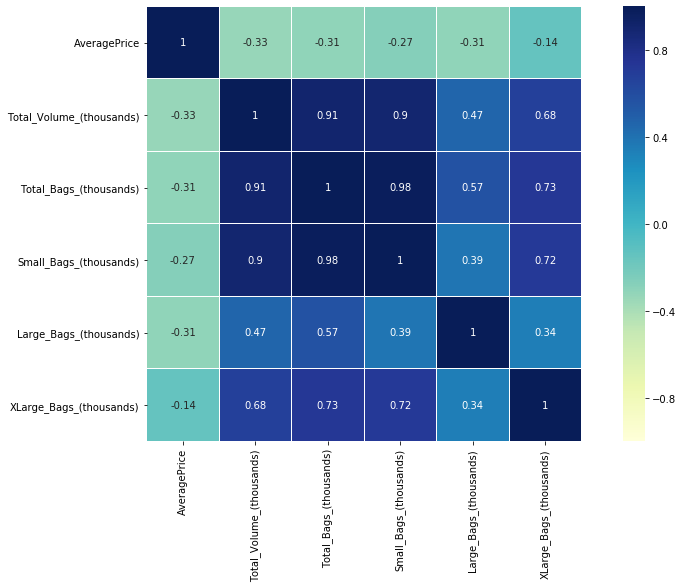

In [89]:
corrmat = avocado.corr(method='pearson')
plt.figure(figsize=(15,8))

ax = sns.heatmap(corrmat, cmap ="YlGnBu", vmin=-1, vmax=1,linewidths = 0.1,annot=True,square=True)
ax.set_ylim(6.0, 0)


(6.0, 0)

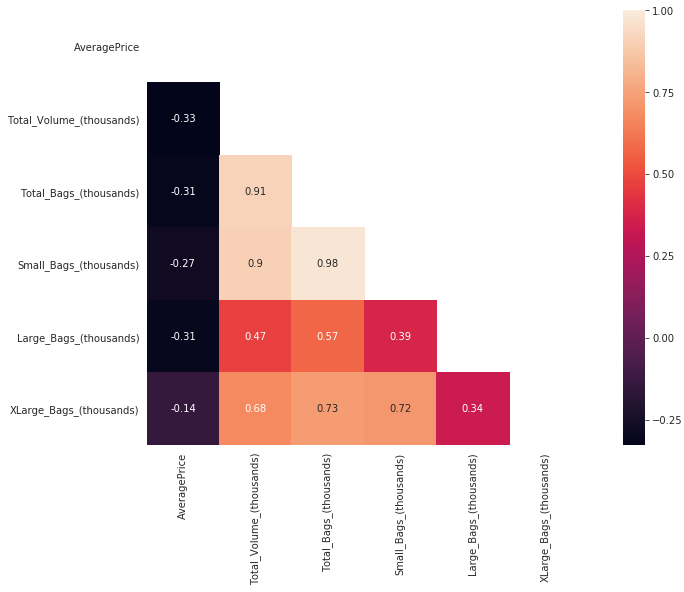

In [90]:
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,8))
    ax = sns.heatmap(corrmat, mask=mask,annot=True, square=True)
ax.set_ylim(6.0, 0)

(6.0, 0)

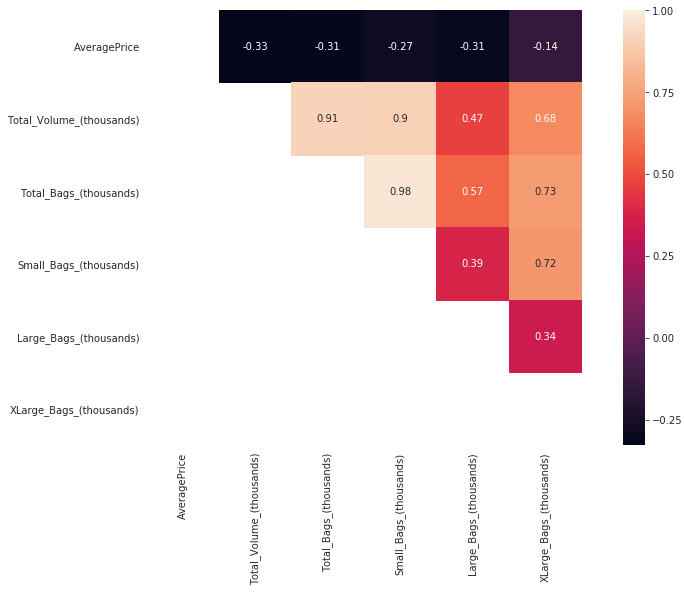

In [91]:
mask = np.zeros_like(corrmat)
mask[np.tril_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,8))
    ax = sns.heatmap(corrmat, mask=mask,annot=True, square=True)
ax.set_ylim(6.0, 0)

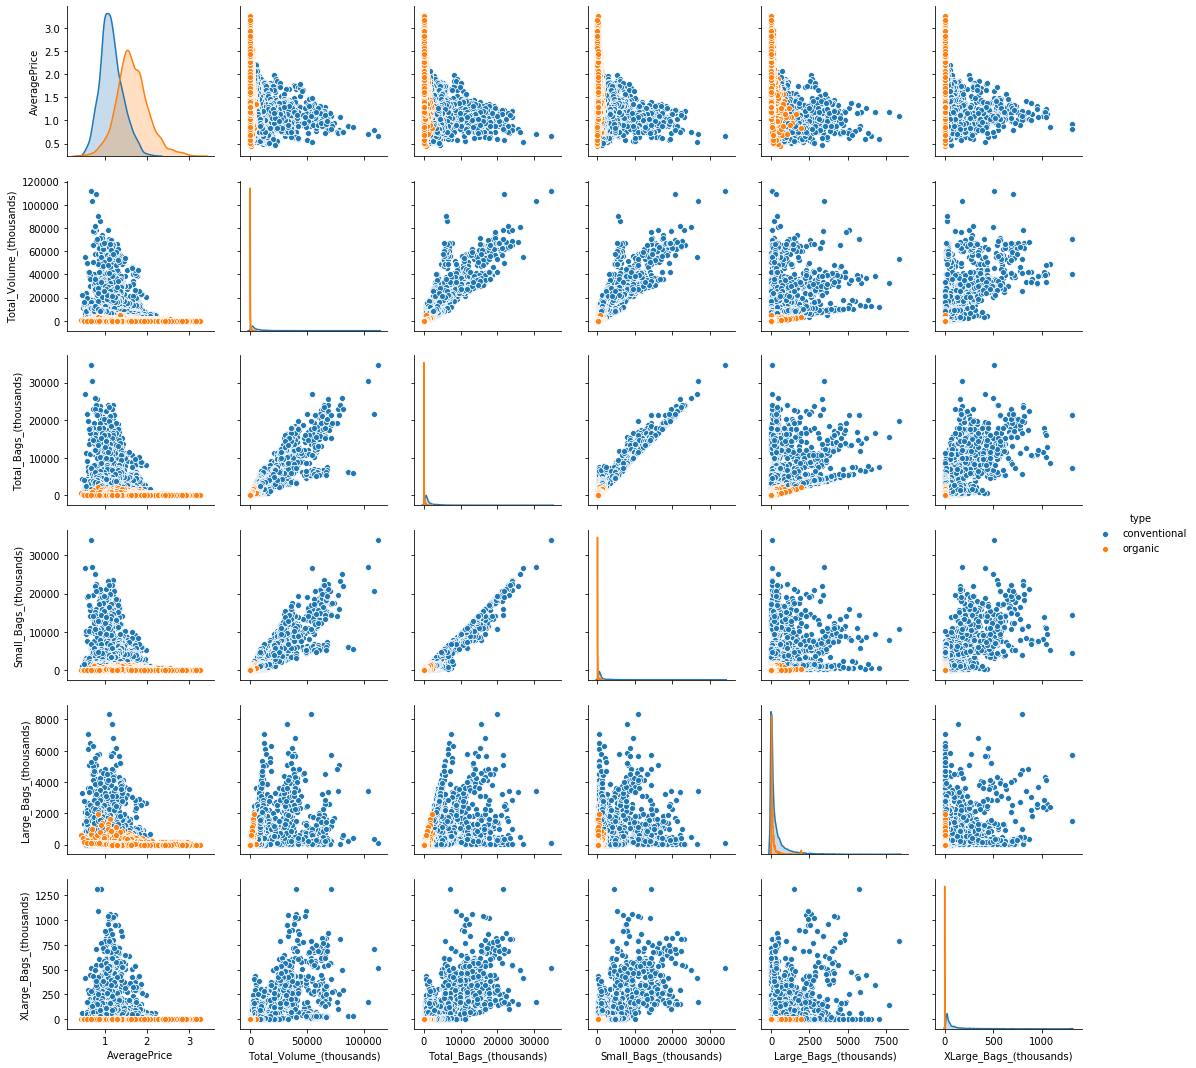

In [92]:
g=sns.pairplot(avocado,hue='type')

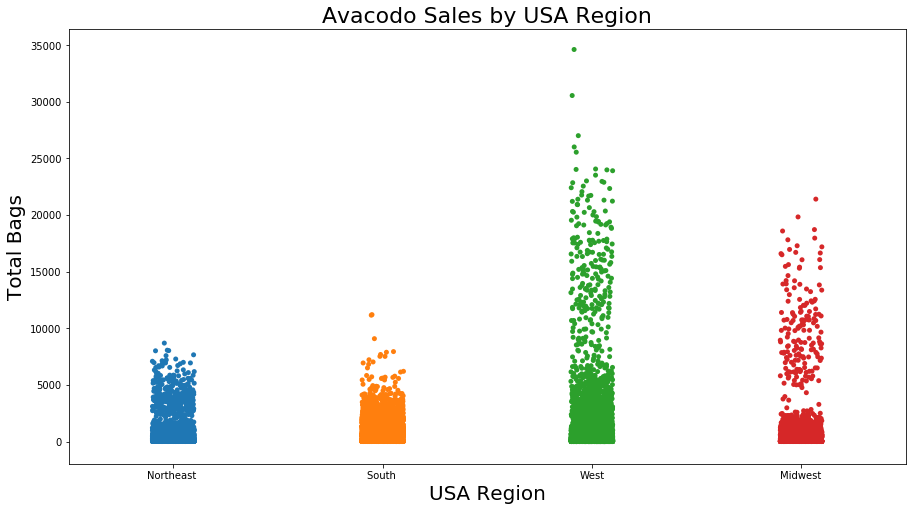

In [93]:
plt.figure(figsize=(15,8))

ax = sns.stripplot(x="USA Region", y="Total_Bags_(thousands)", data=avocado)
plt.title('Avacodo Sales by USA Region', size=22)
plt.xlabel('USA Region',size=20)
plt.ylabel('Total Bags',size=20)
plt.show()

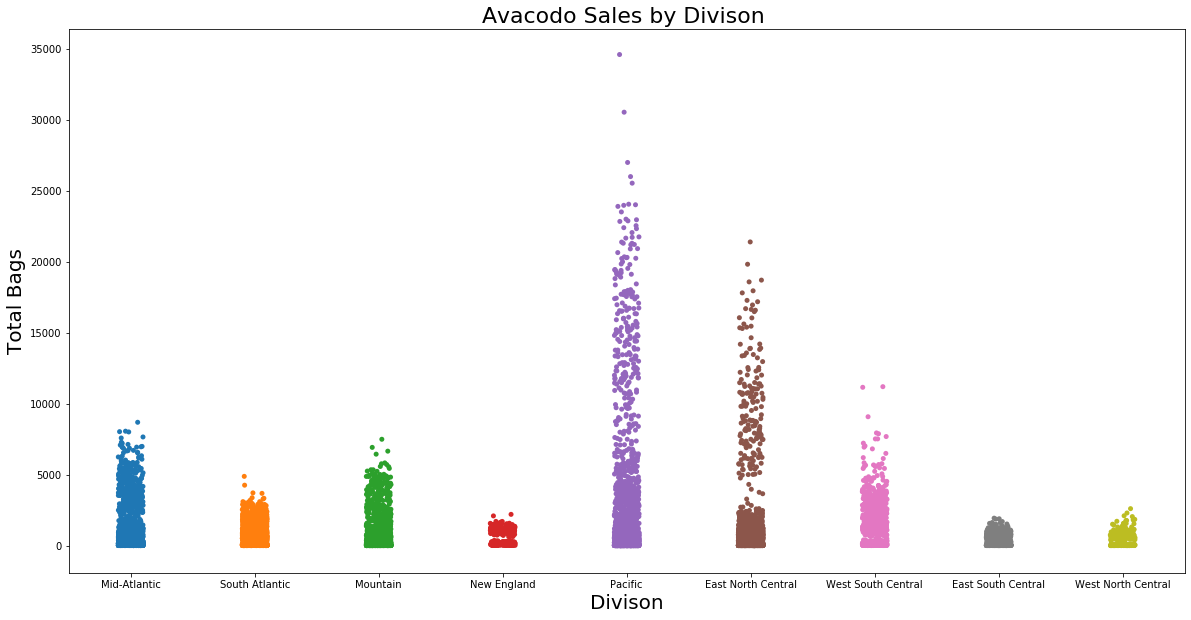

In [94]:
plt.figure(figsize=(20,10))
ax = sns.stripplot(x="Divison", y="Total_Bags_(thousands)", data=avocado)
plt.title('Avacodo Sales by Divison ', size=22)
plt.xlabel('Divison',size=20)
plt.ylabel('Total Bags',size=20)
plt.show()

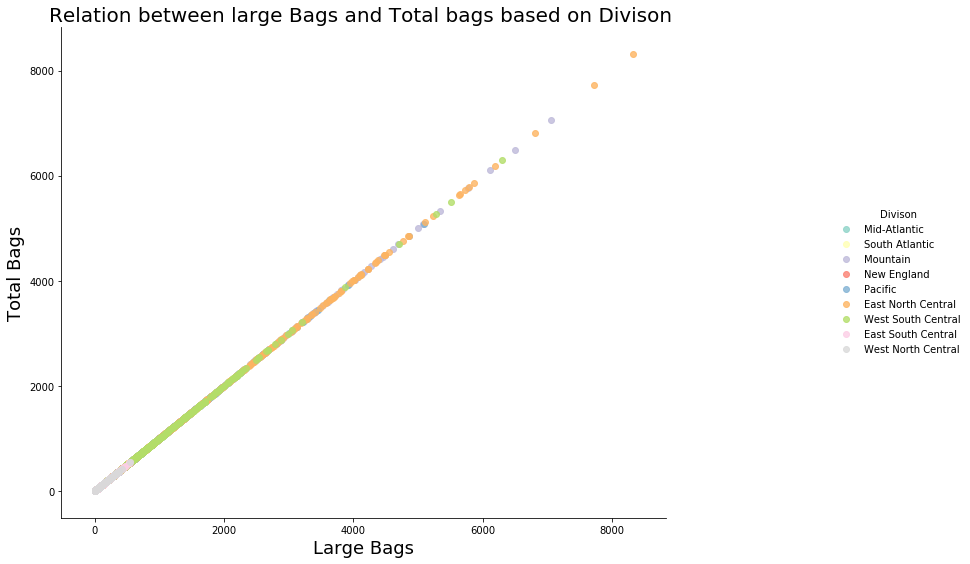

In [95]:
g=sns.lmplot( x="Large_Bags_(thousands)", y="Large_Bags_(thousands)", data=avocado, fit_reg=False, hue='Divison', legend=True,palette="Set3")
g.fig.set_size_inches(15,8)
plt.title('Relation between large Bags and Total bags based on Divison ', size=20)
plt.xlabel('Large Bags',size=18)
plt.ylabel('Total Bags',size=18)
plt.show()

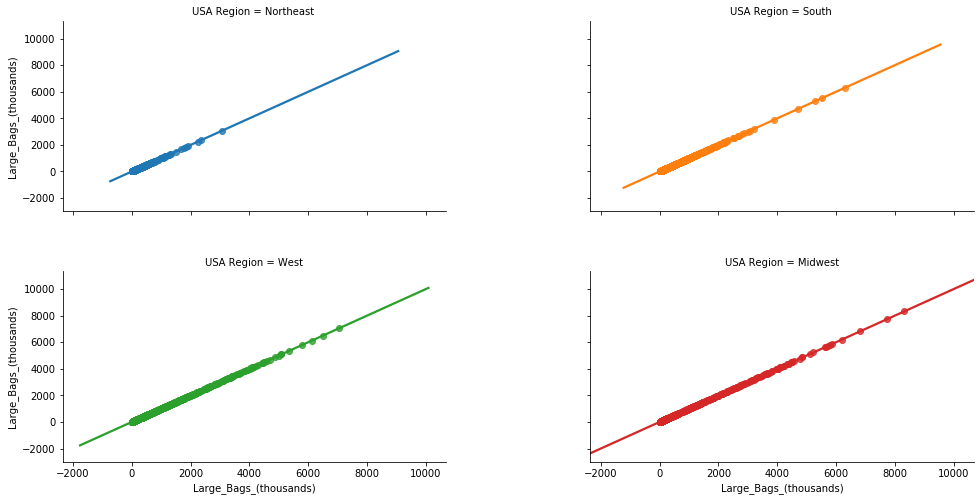

In [96]:
g = sns.lmplot(x="Large_Bags_(thousands)", y="Large_Bags_(thousands)", col="USA Region", hue="USA Region",
               data=avocado, col_wrap=2, height=2)
g.fig.set_size_inches(18,8)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

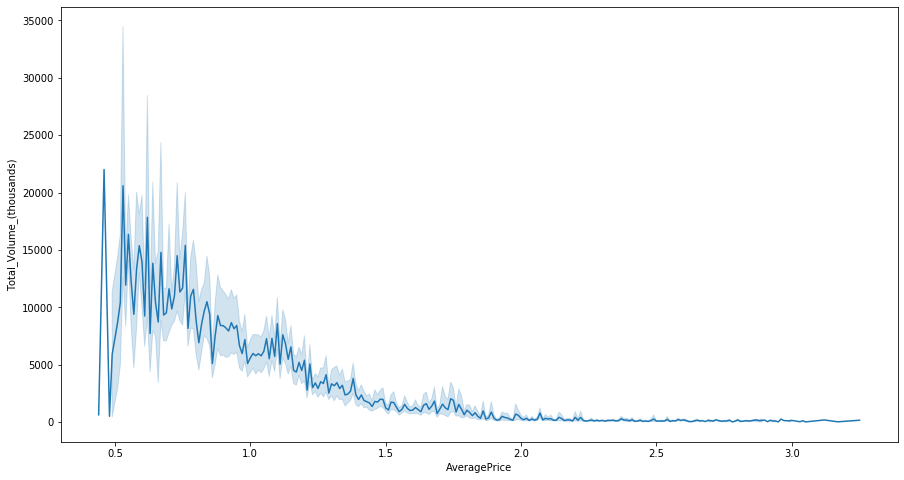

In [98]:
sns.lineplot(x=avocado.AveragePrice,y=avocado['Total_Volume_(thousands)'])

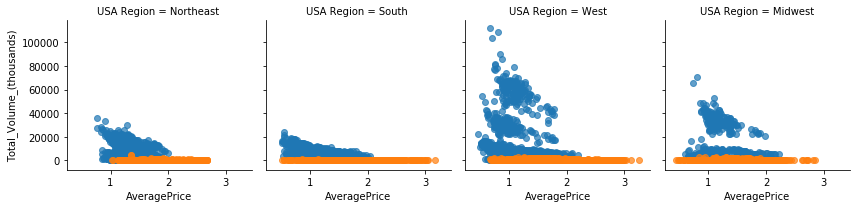

In [99]:
g = sns.FacetGrid(avocado, col="USA Region", hue="type")
g.map(plt.scatter, "AveragePrice", "Total_Volume_(thousands)", alpha=.7)

IndexError: list index out of range

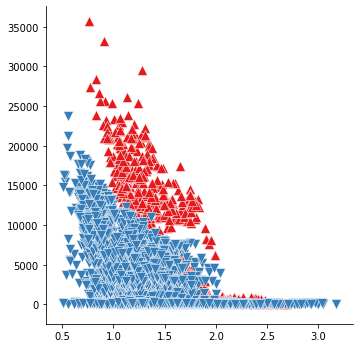

In [100]:
from matplotlib import rcParams

g = sns.FacetGrid(avocado, hue="USA Region", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})

g.map(plt.scatter, "AveragePrice", "Total_Volume_(thousands)", s=100, linewidth=.5, edgecolor="white")

g.add_legend();

In [101]:
avocado_resampled_month=avocado.resample('M').sum()['Total_Bags_(thousands)']

In [102]:
#MA
avocado_resampled_mean=avocado_resampled_month.rolling(window=5).mean()
avocado_resampled_mean=avocado_resampled_mean.dropna()

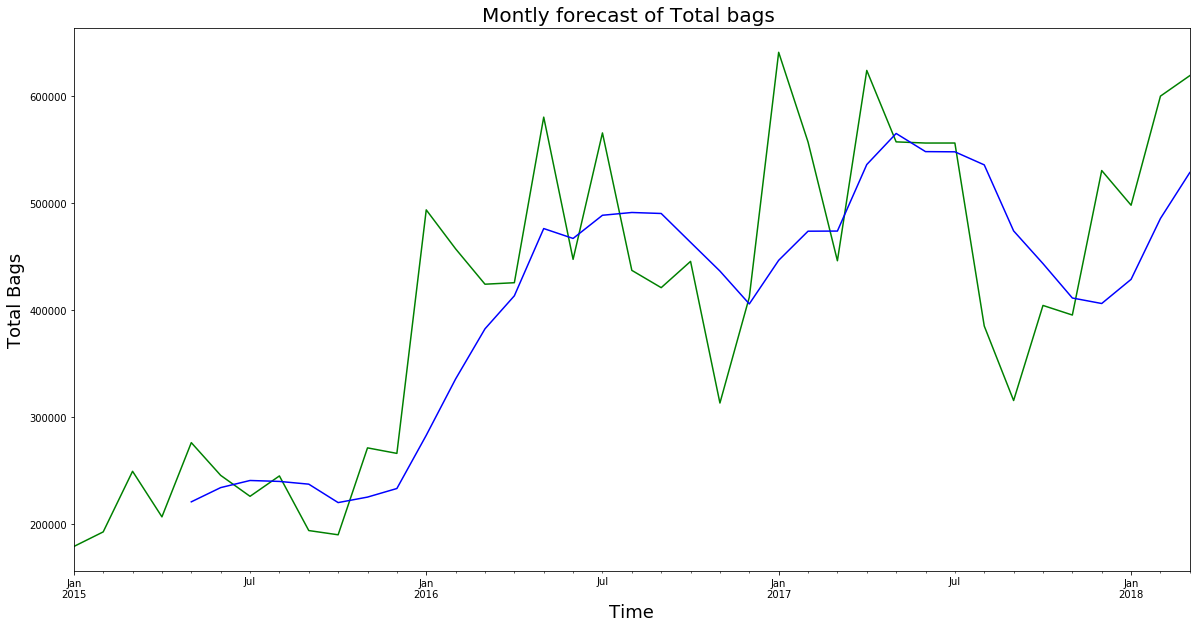

In [103]:
plt.figure(figsize=(20,10))
avocado_resampled_month.plot(color='g')
avocado_resampled_mean.plot(color='b')
plt.title('Montly forecast of Total bags ', size=20)
plt.xlabel('Time',size=18)
plt.ylabel('Total Bags',size=18)
plt.show()

In [104]:
avocado_resampled_month.shift(1)
monthly_forecast=pd.concat([avocado_resampled_month,avocado_resampled_month.shift(1)],axis=1)
monthly_forecast.columns=['Total_Bags_Actual','Total_Bags_Forecast']
monthly_forecast=monthly_forecast.dropna()
# monthly_forecast

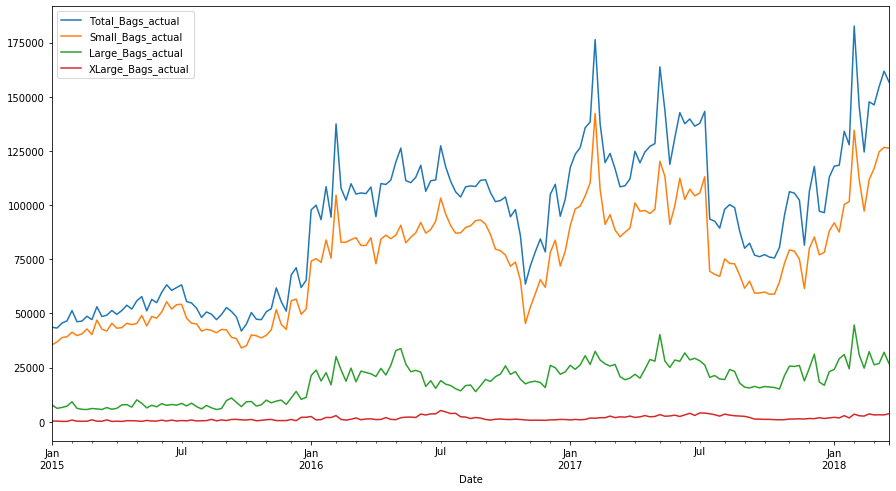

In [115]:
required_columns = ['Total_Bags_(thousands)', 'Small_Bags_(thousands)', 'Large_Bags_(thousands)', 'XLarge_Bags_(thousands)']
avocado_resampled_week=avocado[required_columns].resample('W').sum()
avocado_resampled_week=avocado_resampled_week.rename({'Total_Bags_(thousands)': 'Total_Bags_actual','Small_Bags_(thousands)': 'Small_Bags_actual','Large_Bags_(thousands)': 'Large_Bags_actual','XLarge_Bags_(thousands)': 'XLarge_Bags_actual'}, axis=1)
# avocado_resampled_week

avocado_resampled_week.plot()

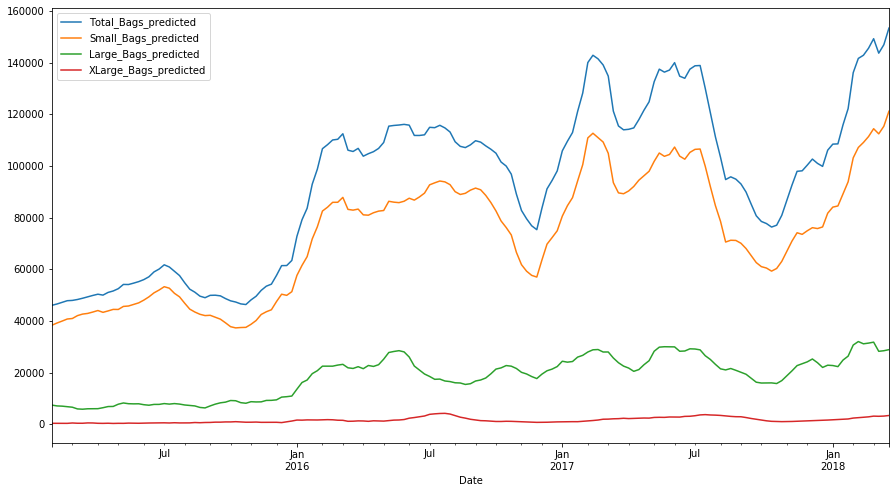

In [114]:
#Moving average
avocado_resampled_week_renamed=avocado_resampled_week.rename({'Total_Bags_actual': 'Total_Bags_predicted','Small_Bags_actual': 'Small_Bags_predicted','Large_Bags_actual': 'Large_Bags_predicted','XLarge_Bags_actual': 'XLarge_Bags_predicted'}, axis=1)
avocado_re_week_mean=avocado_resampled_week_renamed.rolling(window=5).mean()
avocado_re_week_mean=avocado_re_week_mean.dropna()
# avocado_re_week_mean
avocado_re_week_mean.plot()

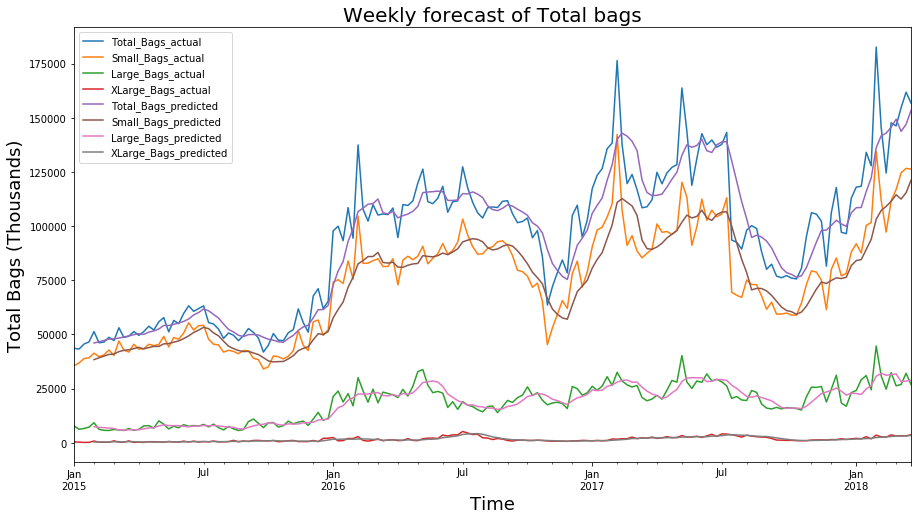

In [117]:
ax = avocado_resampled_week.plot()
avocado_re_week_mean.plot(ax=ax)

plt.title('Weekly forecast of Total bags', size=20)
plt.xlabel('Time',size=18)
plt.ylabel('Total Bags (Thousands)',size=18)
plt.show()